In [1]:
## Communicating directly with the br-EFB via wireless
### 9/3/2018 CJH for LCToRFA

In [1]:
import brEFB_CJH as brefb
from importlib import reload
import time
import pandas as pd
import holoviews as hv
import matplotlib.pyplot as plt
import numpy as np

In [71]:
reload(brefb)

<module 'brEFB_CJH' from 'C:\\Cory\\LCTRFA\\git\\lcf_float\\python\\brEFB_CJH.py'>

In [72]:
brefb.set_banks()

found dmx 6 at ip 201
found dmx 10 at ip 203
Set bank a to 201 and bank b to 203


In [47]:
conf = brefb.get_conf_df('b')
conf

,proportional_gain,integral_gain,derivative_gain,reversed,scaled_min,scaled_max
0,1,0,0,False,0,255
1,1,0,0,False,0,255
2,1,0,0,False,0,255
3,1,0,0,False,0,255


In [48]:
shows = brefb.get_shows_df('a')
shows

,name,length,frame_rate,steppable,end_action
0,La Canada-Flintridge 2019,13050,30,Yes,Do Nothing


In [49]:
brefb.current_state_df()

,axis,transducer 01,transducer 256,setpoint 01,setpoint sp256
0,0,0.001,0,1.000,255
1,1,0.004,1,0.004,1
2,2,0.004,1,0.008,2
3,3,0.477,122,0.012,3


 Progress: [##########] 100.0%  0:▇▇▇▇▇▇▆▅ 1:▁▁▁▁▁▁▁▁ 2:▁▁▁▁▁▁▁▁ 3:▁▁▁▁▁▁▁▁ 

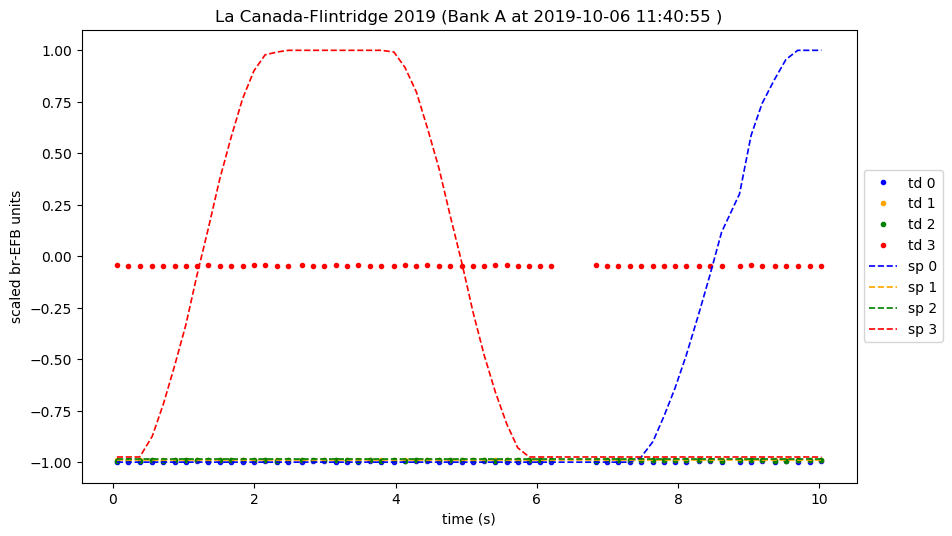

In [69]:
df_a, label = brefb.prepare_all_telemetry(end_time=10, dt=.1, axes=4, bank='a')
brefb.create_matplot(df_a,label)

 Progress: [##########] 100.0%  0:▁▁▁▁▁▁▁▁ 1:▁▁▁▁▁▁▁▁ 2:▇▇▇▇▇▇▇▆ 3:▁▁▁▁▁▁▁▁ 

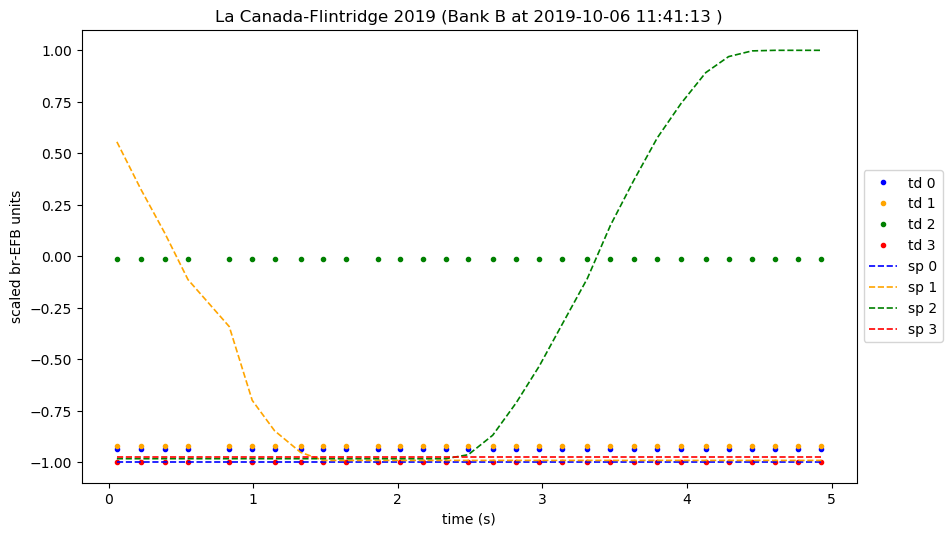

In [70]:
df_b, label = brefb.prepare_all_telemetry(end_time=5, dt=.1, axes=4, bank='b')
brefb.create_matplot(df_b,label)

In [66]:
reload(brefb)

<module 'brEFB_CJH' from 'C:\\Cory\\LCTRFA\\git\\lcf_float\\python\\brEFB_CJH.py'>

In [74]:
# -*- coding: utf-8 -*-
# Unicode: 9601, 9602, 9603, 9604, 9605, 9606, 9607, 9608
bar = '▁▂▃▄▅▆▇█'
bar = '▁▂▃▅▆▇'
barcount = len(bar)
 
def sparkline(numbers, autoscale=True):
    if autoscale:
        mn, mx = np.min(numbers), np.max(numbers)
    else:
        mn, mx = -1.0, 1.0
    extent = mx - mn
    sparkline = ''.join(bar[min([barcount - 1,int((n - mn) / extent * barcount)])] for n in numbers)
    return mn, mx, sparkline


In [75]:
max = 50
b= list((np.linspace(-1,1, 20))**2)
for i in range(max):
    #a=np.random.randint(10, size=10)
    #a=np.random.normal(1, 1, 10)
    a=np.cos(np.linspace(-np.pi-(3*i/max)*np.pi, np.pi-(3*i/max)*np.pi, 20))
    b.insert(0, b.pop())
    mn, mx, spark = sparkline(a)
    mn2, mx2, sparkb = sparkline(b)
    print(f'\r{spark}\t{sparkb}' ,end='',flush=True)
    time.sleep(0.1)

▇▇▇▆▅▃▂▁▁▁▁▁▂▃▅▆▇▇▇▇	▁▁▁▁▂▃▃▅▆▇▇▆▅▃▃▂▁▁▁▁

In [48]:
bar

'▁▂▃▅▆▇'

In [76]:
max = 30
for i in range(max):
    #a=np.random.randint(10, size=10)
    #a=np.random.normal(1, 1, 10)
    a=[np.sin(i),np.sin(np.pi/4+i),np.sin(np.pi/2+i),np.sin(3*np.pi/4+i)]
    mn, mx, spark = sparkline(a,autoscale=False)
    print("\r",spark,end="",flush=True)
    time.sleep(0.12)

 ▂▁▁▃